<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Amazon_Sales_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("/content/amazon_sales_dataset.csv")
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443.0,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475.0,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183.0,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212.0,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308.0,201.68,806.72


In [3]:
df.isna().sum()

,0
order_id,0
order_date,0
product_id,0
product_category,0
price,0
discount_percent,0
quantity_sold,0
customer_region,0
payment_method,0
rating,0


In [4]:
df.nunique()

,0
order_id,25237
order_date,730
product_id,3994
product_category,6
price,19770
discount_percent,6
quantity_sold,5
customer_region,4
payment_method,5
rating,41


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,25237.0,12619.000000,7285.438708,1.00,6310.00,12619.000,18928.0000,25237.00
product_id,25237.0,2992.627690,1154.254871,1000.00,1987.00,2992.000,3994.0000,4999.00
price,25237.0,252.271809,143.131664,5.01,127.32,252.900,376.3700,499.99
discount_percent,25237.0,13.411856,9.885213,0.00,5.00,15.000,20.0000,30.00
quantity_sold,25237.0,3.012165,1.416639,1.00,2.00,3.000,4.0000,5.00
rating,25237.0,2.991778,1.157312,1.00,2.00,3.000,4.0000,5.00
review_count,25236.0,248.797710,144.284206,0.00,124.00,248.000,373.0000,499.00
discounted_price,25236.0,218.548941,127.380012,3.60,108.87,215.505,322.5825,499.89
total_revenue,25236.0,658.884621,526.851453,4.23,241.20,507.585,973.8850,2498.85


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25237 entries, 0 to 25236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          25237 non-null  int64  
 1   order_date        25237 non-null  object 
 2   product_id        25237 non-null  int64  
 3   product_category  25237 non-null  object 
 4   price             25237 non-null  float64
 5   discount_percent  25237 non-null  int64  
 6   quantity_sold     25237 non-null  int64  
 7   customer_region   25237 non-null  object 
 8   payment_method    25237 non-null  object 
 9   rating            25237 non-null  float64
 10  review_count      25236 non-null  float64
 11  discounted_price  25236 non-null  float64
 12  total_revenue     25236 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 2.5+ MB


In [7]:
df.drop(columns=['order_id'],inplace=True)

In [8]:
df.drop(columns=['order_date','product_id','discount_percent','quantity_sold'],inplace=True)

In [9]:
df.head()

,product_category,price,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,Books,128.75,North America,UPI,3.5,443.0,115.88,463.52
1,Fashion,302.60,Asia,Credit Card,3.7,475.0,242.08,1210.40
2,Sports,495.80,Europe,UPI,4.4,183.0,396.64,793.28
3,Books,371.95,Middle East,UPI,5.0,212.0,316.16,1264.64
4,Beauty,201.68,Middle East,UPI,4.6,308.0,201.68,806.72


In [10]:
df.columns

Index(['product_category', 'price', 'customer_region', 'payment_method',
       'rating', 'review_count', 'discounted_price', 'total_revenue'],
      dtype='object')

In [11]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

print(numerical_cols)

Index(['price', 'rating', 'review_count', 'discounted_price', 'total_revenue'], dtype='object')


In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns

print(categorical_cols)

Index(['product_category', 'customer_region', 'payment_method'], dtype='object')


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

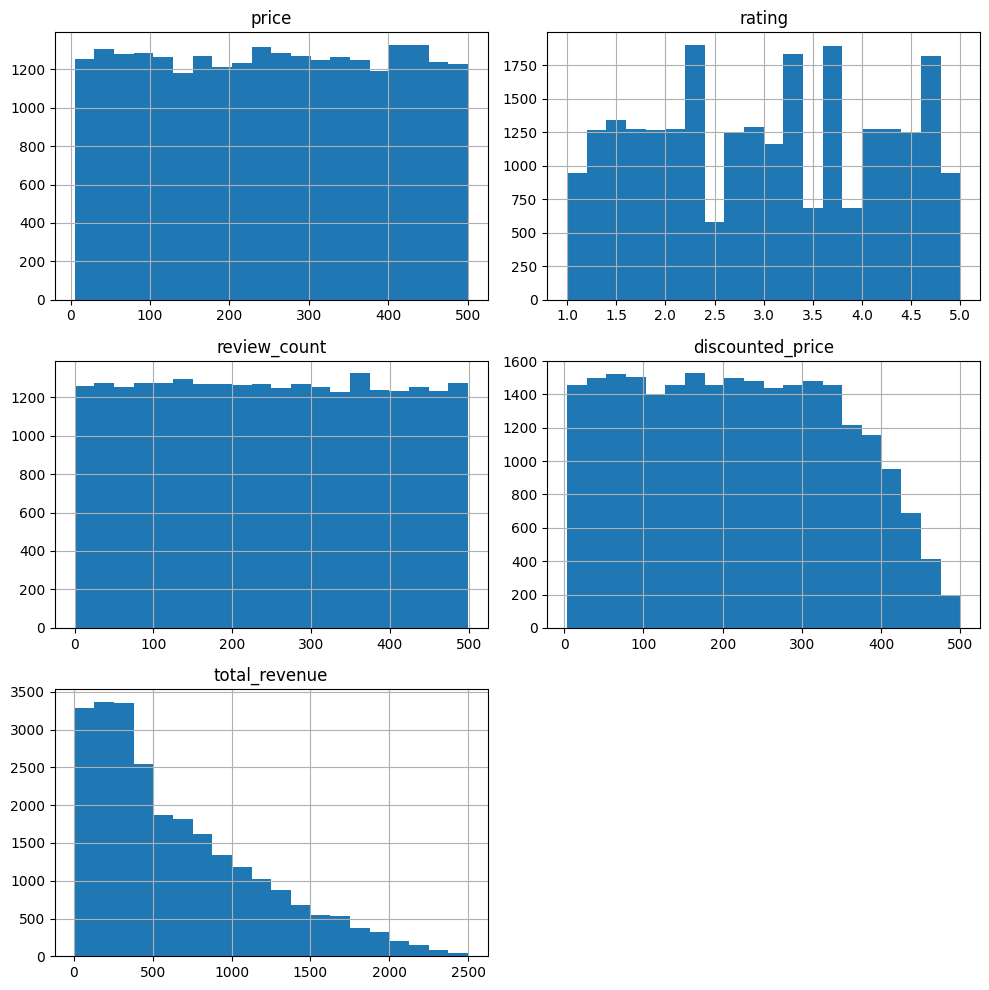

In [14]:
df[numerical_cols].hist(figsize=(10,10),bins=20)
plt.title("Numerical Columns Histrogram Plot")
plt.tight_layout()
plt.show()

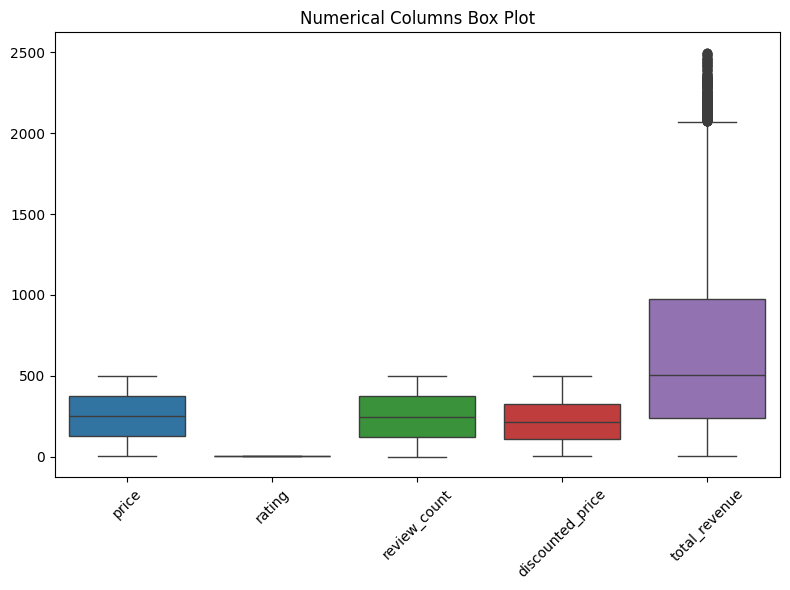

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[numerical_cols])
plt.title("Numerical Columns Box Plot")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

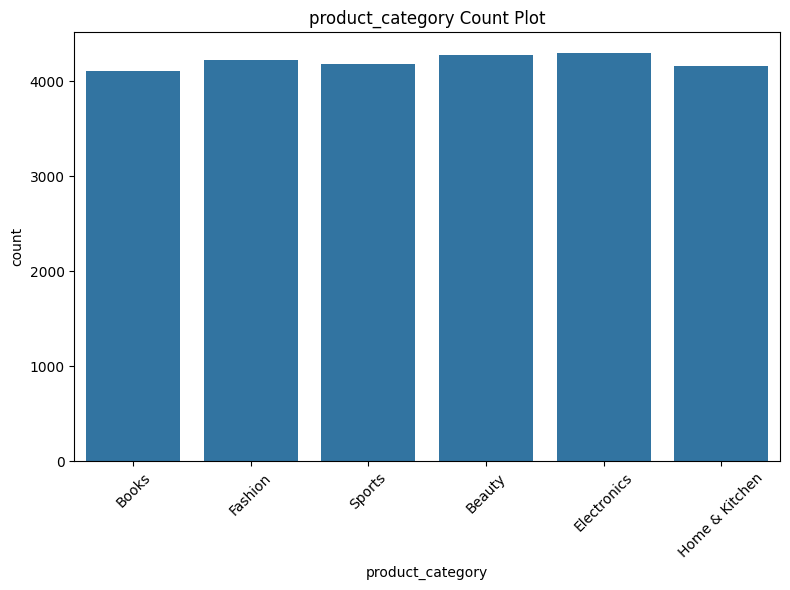

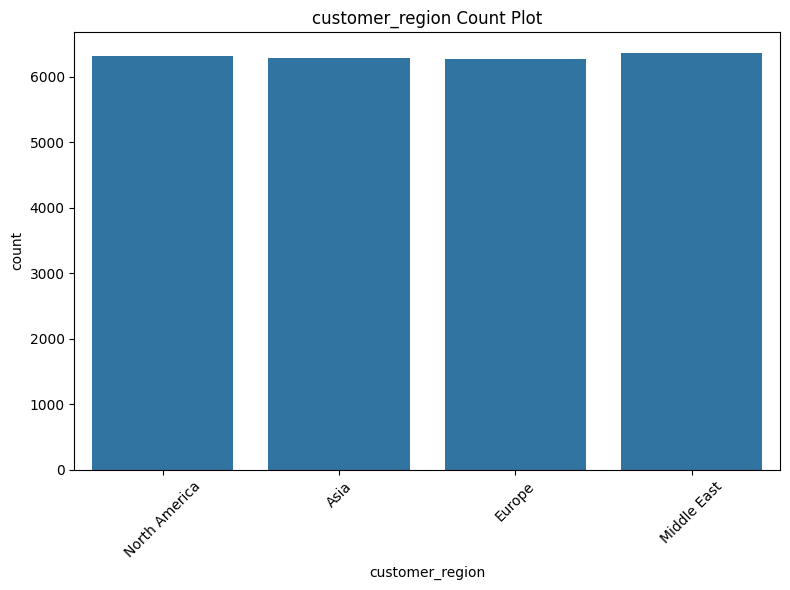

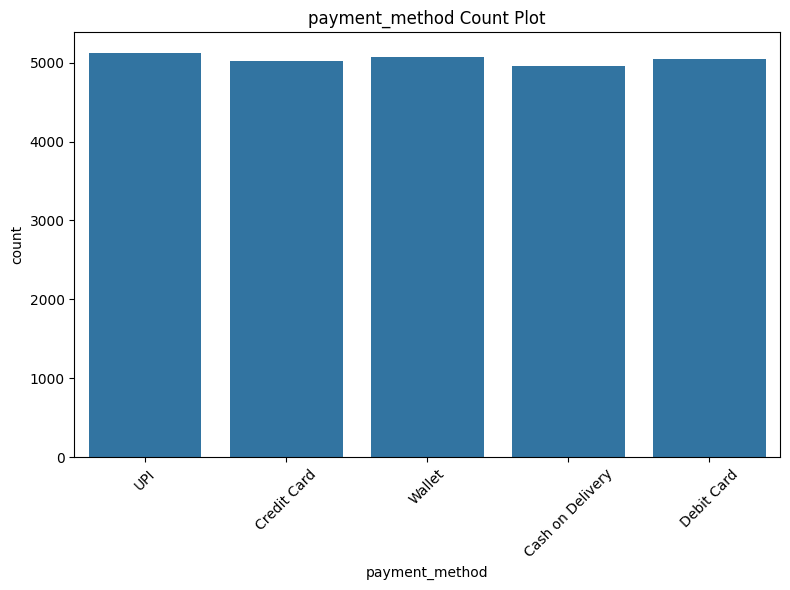

In [16]:
for col in categorical_cols:
  plt.figure(figsize=(8,6))
  sns.countplot(data=df,x=col)
  plt.title(f"{col} Count Plot")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


In [17]:
print(numerical_cols)

Index(['price', 'rating', 'review_count', 'discounted_price', 'total_revenue'], dtype='object')


In [18]:
num_cols =['price','rating','review_count', 'discounted_price']

In [19]:
target_col ="total_revenue"

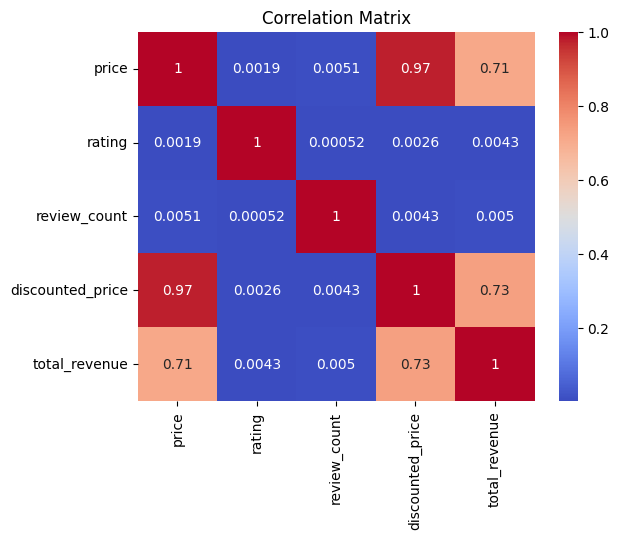

In [20]:
matrix_corr = df[num_cols + [target_col]].corr()
sns.heatmap(matrix_corr,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [21]:
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]
print(len(outliers))

364


In [22]:
outlier_cols = [target_col]
for col in outlier_cols:
    # check for negative values
    if (df[col] < 0).any():
        print(f"Warning: Negative values in {col}, can't apply log directly")
    else:
        df[col] = np.log1p(df[col])  # log(1+x) transformation


In [23]:
df.head()

,product_category,price,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,Books,128.75,North America,UPI,3.5,443.0,115.88,6.141005
1,Fashion,302.60,Asia,Credit Card,3.7,475.0,242.08,7.099532
2,Sports,495.80,Europe,UPI,4.4,183.0,396.64,6.677436
3,Books,371.95,Middle East,UPI,5.0,212.0,316.16,7.143333
4,Beauty,201.68,Middle East,UPI,4.6,308.0,201.68,6.694215


In [24]:
X = df.drop('total_revenue',axis=1)
y = df['total_revenue']

In [25]:
numeric_features = X.select_dtypes(include = ['int64','float64']).columns
print(numeric_features)
categorical_features = X.select_dtypes(include = ['object']).columns
print(categorical_features)


Index(['price', 'rating', 'review_count', 'discounted_price'], dtype='object')
Index(['product_category', 'customer_region', 'payment_method'], dtype='object')


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
num_features_pip = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())

    ]
)

In [27]:
cat_features_pip = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder())
    ]
)

In [28]:
combine_pip = ColumnTransformer(
    [
        ('num_pip',num_features_pip,numeric_features),
        ('cat_pip',cat_features_pip,categorical_features)
    ]
)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,StackingRegressor,VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
lr = LinearRegression()
dcr = DecisionTreeRegressor()
etr = ExtraTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [32]:
stacking_rg = StackingRegressor(
    estimators=[
        ('lr',lr),
        ('dcr',dcr),
        ('etr',etr),
        ('rfr',rfr),
        ('gbr',gbr)
    ]
)

In [33]:
voting_rg = VotingRegressor(
    estimators=[
        ('lr',lr),
        ('dcr',dcr),
        ('etr',etr),
        ('rfr',rfr),
        ('gbr',gbr)
    ]
)